In [115]:
import numpy as np
import matplotlib.pyplot as plt

In [116]:
system_sizes = np.load('data/system_sizes.npy')
bond_dims = np.load('data/bond_dims.npy')
tr_set_sizes = np.load('data/tr_set_sizes.npy')

In [117]:
threshold=.99

In [118]:
fidelities_scaling_L = np.load('data/rand_fidelities_scaling_L_D=2.npy')
# fidelities_scaling_D = np.load('data/set3/rand_fidelities_scaling_D_L=4.npy')

In [119]:
nseed=fidelities_scaling_L.shape[-1]

In [120]:
%matplotlib inline

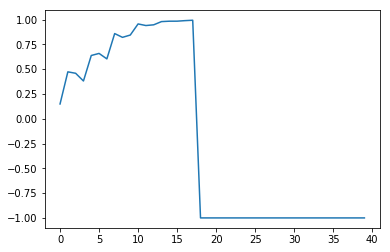

In [121]:
plt.plot(fidelities_scaling_L[-2, :, 2])

In [122]:
def get_N_for_threshold(f, threshold):
    f = f[f>0]
    try:
        iabove = np.where(f>threshold)[0][0]
    
        return int(tr_set_sizes[iabove])
    except IndexError:
        return -1
    

In [123]:
Nthresh_scaling_L = np.empty((len(system_sizes),nseed))
# Nthresh_scaling_D= np.empty((len(bond_dims),nseed))


In [124]:
for i in range(nseed):
    for il in range(len(system_sizes)):
        Nthresh_scaling_L[il, i] = get_N_for_threshold(fidelities_scaling_L[il, :, i],threshold)
#     for iD in range(len(bond_dims)):
#         Nthresh_scaling_D[iD, i] = get_N_for_threshold(fidelities_scaling_D[iD, :, i],threshold)

In [125]:
NL = len(system_sizes)
ND = len(bond_dims)
Nset = len(tr_set_sizes)

In [126]:
N_L_mean =np.empty(len(system_sizes))
N_L_std =np.empty(len(system_sizes))
for i in range(len(system_sizes)):
    N =Nthresh_scaling_L[i, :]
    N_L_mean[i] = np.mean(N[N>0])
    N_L_std[i] = np.std(N[N>0])

In [96]:
N_D_mean =np.empty(ND)
N_D_std =np.empty(ND)
for i in range(ND):
    N =Nthresh_scaling_D[i, :]
    N_D_mean[i] = np.mean(N[N>0])
    N_D_std[i] = np.std(N[N>0])

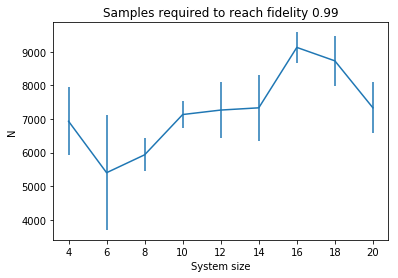

In [127]:
fig, ax = plt.subplots()
plt.errorbar(system_sizes, N_L_mean, yerr=N_L_std)
plt.xlabel("System size")
plt.ylabel("N")
plt.title("Samples required to reach fidelity {0:.2f}".format(threshold))
fig.savefig("plots/fidelity_threshold_vs_L.pdf")

fig, ax = plt.subplots()
plt.errorbar(bond_dims, N_D_mean, yerr=N_D_std)
plt.xlabel("Bond dimension")
plt.ylabel("N")
plt.title("Samples required to reach fidelity {0:.2f}".format(threshold))

In [128]:
fmean_L = -1 * np.ones((NL, Nset) )
fstd_L =  -1 * np.ones((NL, Nset) )
for i in range(NL):
    for j in range(Nset):
        f = fidelities_scaling_L[i,j, :]
        f = f[f>0]
        if len(f)>1:
            fmean_L[i,j]= np.mean(f)
            fstd_L[i,j] = np.std(f) / np.sqrt(nseed)
        else:
            fmean_L[i, j] = -1
            fstd_L[i,j] = -1


fmean_D = -1 * np.ones((ND, Nset) )
fstd_D =  -1 * np.ones((ND, Nset) )
for i in range(ND):
    for j in range(Nset):
        f = fidelities_scaling_D[i,j, :]
        f = f[f>0]
        if len(f)>1:
            fmean_D[i,j]= np.mean(f)
            fstd_D[i,j] = np.std(f) / np.sqrt(nseed)
        else:
            fmean_D[i, j] = -1
            fstd_D[i,j] = -1


In [129]:
from matplotlib.cm import get_cmap
cmap = get_cmap('Reds')

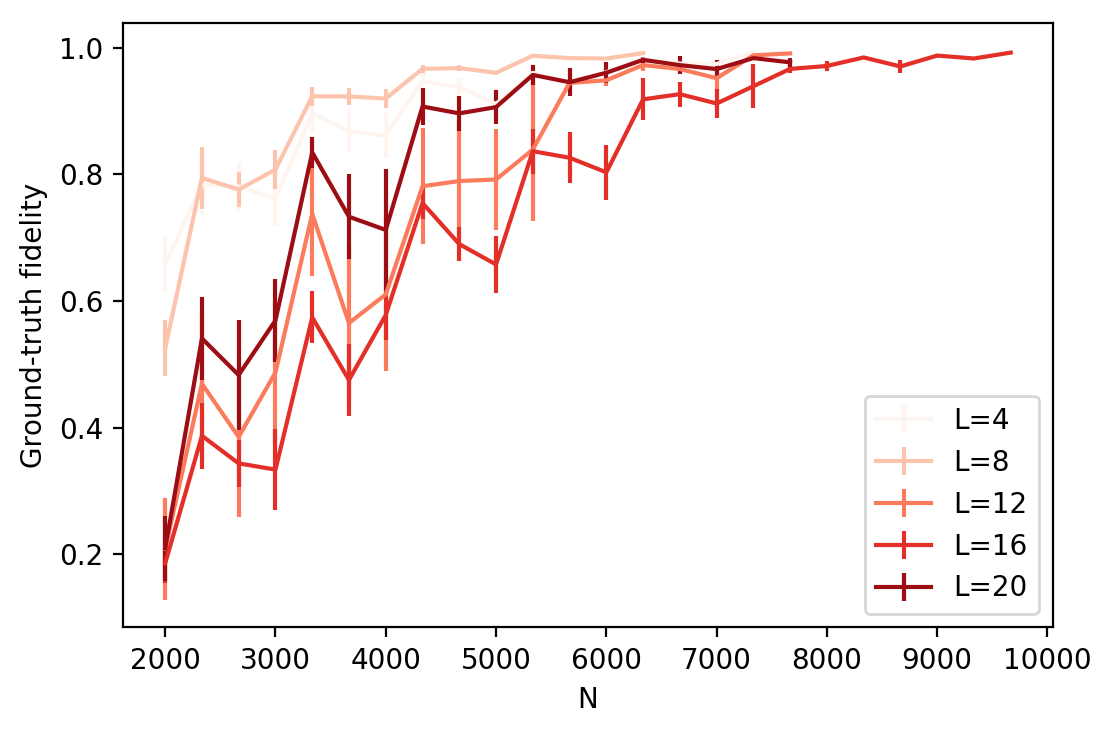

In [130]:
fig, ax = plt.subplots(dpi=200)
for i in range(0,NL,2):
    f = fmean_L[i, :]
    e = fstd_L[i, :]
    plt.errorbar(tr_set_sizes[f>0], f[f>0], e[f>0], 
                 label="L=%d"%system_sizes[i], color=cmap(i/NL))

plt.legend()
plt.xlabel("N")
plt.ylabel("Ground-truth fidelity")
fig.savefig("plots/fidelity_vs_N_scaling_L.pdf")

cmap=get_cmap('Blues')

fig, ax = plt.subplots()
for i in range(0,ND,2):
    f = fmean_D[i, :]
    e = fstd_D[i, :]
    plt.errorbar(tr_set_sizes[f>0], f[f>0], e[f>0], 
                 label="D=%d"%bond_dims[i], color=cmap(i/ND))

plt.legend()
plt.xlabel("N")
plt.ylabel("Ground-truth fidelity")
fig.savefig("plots/fidelity_vs_N_scaling_D.pdf")